In [1]:
import re,os
import string
import pandas as pd
import numpy as np

In [5]:
'''!pip install --user nltk
!pip install --upgrade nltk
import nltk
nltk.download('punkt')'''

"!pip install --user nltk\n!pip install --upgrade nltk\nimport nltk\nnltk.download('punkt')"

In [2]:
path = r'C:\Users\hp\Desktop\Spring_22\MSCI_641\NLP_practise\archive (1)\sentiment labelled sentences\sentiment labelled sentences'
os.chdir(path)
print(os.getcwd())

C:\Users\hp\Desktop\Spring_22\MSCI_641\NLP_practise\archive (1)\sentiment labelled sentences\sentiment labelled sentences


In [7]:
for (dirpath, dirnames, filenames) in os.walk(os.getcwd()):
    #print(filenames)
    for file in filenames:
        if '.txt' in file:
            print(file)
            #print(file.split('_')[0])
            #file.split('_')[0] = pd.read_csv(file)

amazon_cells_labelled.txt
imdb_labelled.txt
readme.txt
yelp_labelled.txt


In [3]:
amazon = pd.read_csv(r'amazon_cells_labelled.txt',delimiter ='\t', header=None)
amazon.columns = ['Review_text','Review_class']
imdb = pd.read_csv(r'imdb_labelled.txt',delimiter ='\t',header=None)
imdb.columns = ['Review_text','Review_class']
yelp = pd.read_csv(r'yelp_labelled.txt',delimiter ='\t',header=None)
yelp.columns = ['Review_text','Review_class']

data = pd.concat([amazon,imdb,yelp])

In [9]:
amazon.head()

,Review_text,Review_class
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [10]:
imdb.head()

,Review_text,Review_class
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [11]:
yelp.head()

,Review_text,Review_class
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [5]:
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [52]:
amazon.Review_text.iloc[0]

'So there is no way for me to plug it in here in the US unless I go by a converter.'

In [53]:
word_tokenize(amazon.Review_text.iloc[0])

['So',
 'there',
 'is',
 'no',
 'way',
 'for',
 'me',
 'to',
 'plug',
 'it',
 'in',
 'here',
 'in',
 'the',
 'US',
 'unless',
 'I',
 'go',
 'by',
 'a',
 'converter',
 '.']

In [54]:
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [7]:
def clean_text(df) :
    lines = df.Review_text.values.tolist()
    reviews = []
    for l in lines:
        l = l.lower()
        url_pattern = r'[A-Za-z0-9]+://[A-Za-z0-9%-_]+(/[A-Za-z0-9%-_])*(#|\\?)[A-Za-z0-9%-_&=]*'
        pattern = re.compile(url_pattern)
        l = pattern.sub('',l)
        punc_pattern = string.punctuation
        punc = r"[{}]".format(punc_pattern)
        l= re.sub(punc, "", l)
        word_token = word_tokenize(l)
        #print(word_token)
        word = [word for word in word_token if word.isalpha()]
        stop_words = set(stopwords.words("english"))
        stop_words.discard("not")
        PS = PorterStemmer()
        word = [PS.stem(w) for w in word if w not in stop_words]
        #print(word)
        words = ' '.join(word)
        reviews.append(words)
    return reviews

In [20]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [68]:
clean_text(amazon)[0:5]

['way plug us unless go convert',
 'good case excel valu',
 'great jawbon',
 'tie charger convers last minutesmajor problem',
 'mic great']

In [66]:
clean_text(imdb)[0:5]

['slowmov aimless movi distress drift young man',
 'not sure lost flat charact audienc nearli half walk',
 'attempt arti black white clever camera angl movi disappoint becam even ridicul act poor plot line almost nonexist',
 'littl music anyth speak',
 'best scene movi gerardo tri find song keep run head']

In [67]:
clean_text(yelp)[0:5]

['wow love place',
 'crust not good',
 'not tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price']

In [76]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(min_df = 3)
X = cv.fit_transform(clean_text(amazon)).toarray()
#print(X)
y = amazon['Review_class'].values
print(f"Shape of X is {X.shape} and y is {y.shape}")

Shape of X is (1000, 437) and y is (1000,)


Mean accuracy is 0.68
Precision is 0.6520833333333333
F1 score is 0.7097505668934242
Confusion matrix is [[231 167]
 [ 89 313]]


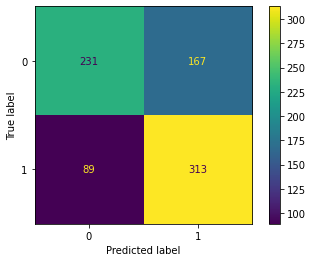

In [81]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score,  f1_score, confusion_matrix, plot_confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.2, random_state =42)
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
#print(X_pred)
#gnb.score(X_test,y_test)
print(f"Mean accuracy is {accuracy_score(y_test,y_pred)}")
print(f"Precision is {precision_score(y_test,y_pred)}")
print(f"F1 score is {f1_score(y_test,y_pred)}")
print(f"Confusion matrix is {confusion_matrix(y_test,y_pred)}")
plot_confusion_matrix(gnb,X_test,y_test)

In [12]:
##TF_IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfid = TfidfVectorizer(min_df = 3)
X = tfid.fit_transform(clean_text(data)).toarray()
y= data['Review_class'].values
print(f"Shape of X is {np.shape(X)} and y is {np.shape(y)}")

Shape of X is (2748, 1209) and y is (2748,)


Mean accuracy is 0.6193724420190996
Precision is 0.6075224856909239
F1 score is 0.6396900559621179
Confusion matrix is [[619 480]
 [357 743]]


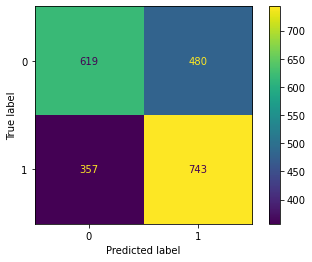

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score,  f1_score, confusion_matrix, plot_confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.2, random_state =42)
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
#print(X_pred)
#gnb.score(X_test,y_test)
print(f"Mean accuracy is {accuracy_score(y_test,y_pred)}")
print(f"Precision is {precision_score(y_test,y_pred)}")
print(f"F1 score is {f1_score(y_test,y_pred)}")
print(f"Confusion matrix is {confusion_matrix(y_test,y_pred)}")
plot_confusion_matrix(gnb,X_test,y_test)